# COVID-19 pandemic data analysis

### Obtain data from John Hopkins CSSE repository 

Using @GaelVaroquaux [`covid-dashboard`](https://github.com/covid19-dash/covid-dashboard) helpers

In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, "./covid-dashboard/")

In [2]:
import data_input

data = data_input.get_data()

In [3]:
data

type             confirmed                                              \
iso                    AFG    AGO     ALB     AND                  ARE   
country_region Afghanistan Angola Albania Andorra United Arab Emirates   
date                                                                     
2020-01-22               0      0       0       0                    0   
2020-01-23               0      0       0       0                    0   
2020-01-24               0      0       0       0                    0   
2020-01-25               0      0       0       0                    0   
2020-01-26               0      0       0       0                    0   
...                    ...    ...     ...     ...                  ...   
2021-07-30          146523  42646  133036   14678               679321   
2021-07-31          146523  42777  133081   14678               680858   
2021-08-01          146523  42815  133121   14678               682377   
2021-08-02          147985  42970  133146   14747               683914   
2021-08-03          148572  43070  133211   14766               685462   

type                                                                    ...  \
iso                  ARG     ARM                 ATG       AUS     AUT  ...   
country_region Argentina Armenia Antigua and Barbuda Australia Austria  ...   
date                                                                    ...   
2020-01-22             0       0                   0         0       0  ...   
2020-01-23             0       0                   0         0       0  ...   
2020-01-24             0       0                   0         0       0  ...   
2020-01-25             0       0                   0         0       0  ...   
2020-01-26             0       0                   0         4       0  ...   
...                  ...     ...                 ...       ...     ...  ...   
2021-07-30       4919408  229867                1303     34130  658518  ...   
2021-07-31       4929764  230110                1303     34383  659056  ...   
2021-08-01       4935847  230339                1303     34612  659508  ...   
2021-08-02       4947030  230476                1303     34836  659872  ...   
2021-08-03       4961880  230713                1303     35089  660262  ...   

type                death                                                     \
iso                   UZB                              VCT       VEN     VNM   
country_region Uzbekistan Saint Vincent and the Grenadines Venezuela Vietnam   
date                                                                           
2020-01-22              0                                0         0       0   
2020-01-23              0                                0         0       0   
2020-01-24              0                                0         0       0   
2020-01-25              0                                0         0       0   
2020-01-26              0                                0         0       0   
...                   ...                              ...       ...     ...   
2021-07-30            866                               12      3576    1161   
2021-07-31            874                               12      3591    1306   
2021-08-01            880                               12      3607    1306   
2021-08-02            886                               12      3623    1306   
2021-08-03            893                               12      3637    2071   

type                                                             
iso                VUT   WSM   YEM          ZAF    ZMB      ZWE  
country_region Vanuatu Samoa Yemen South Africa Zambia Zimbabwe  
date                                                             
2020-01-22           0     0     0            0      0        0  
2020-01-23           0     0     0            0      0        0  
2020-01-24           0     0     0            0      0        0  
2020-01-25           0     0     0      

### Select countries of interest and retrieve confirmed cases and deaths dataframes

In [8]:
COUNTRIES = ["ESP", "GBR", "DEU", "AUT"]

In [18]:
print(data.xs(2, axis=1, level=1).groupby(axis=1, level=1).first().columns.values)
confirmed = data["confirmed"][COUNTRIES]
dead = data["death"][COUNTRIES]

KeyError: 2

Text(0.5, 1.0, 'Log-scale plot of number of confirmed cases')

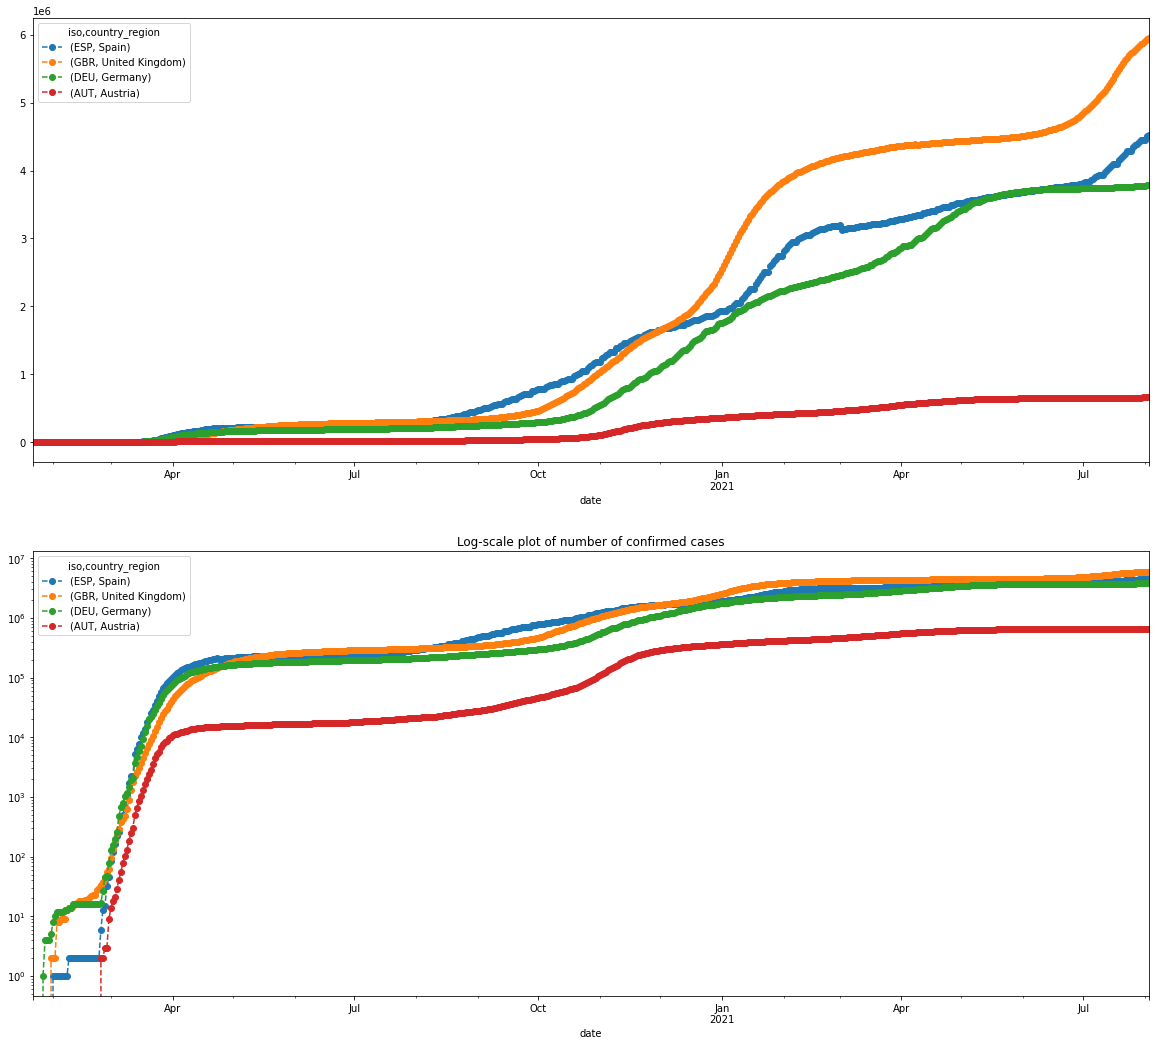

In [10]:
fig, (top_ax, bottom_ax) = plt.subplots(2, 1, figsize=(20, 18))
confirmed.plot(ax=top_ax, linestyle="--", marker="o")
confirmed.plot(ax=bottom_ax, linestyle="--", marker="o")
bottom_ax.set_yscale("log")
bottom_ax.set_title("Log-scale plot of number of confirmed cases")

Text(0.5, 1.0, 'Log-scale plot of number of total deaths (daily confirmed)')

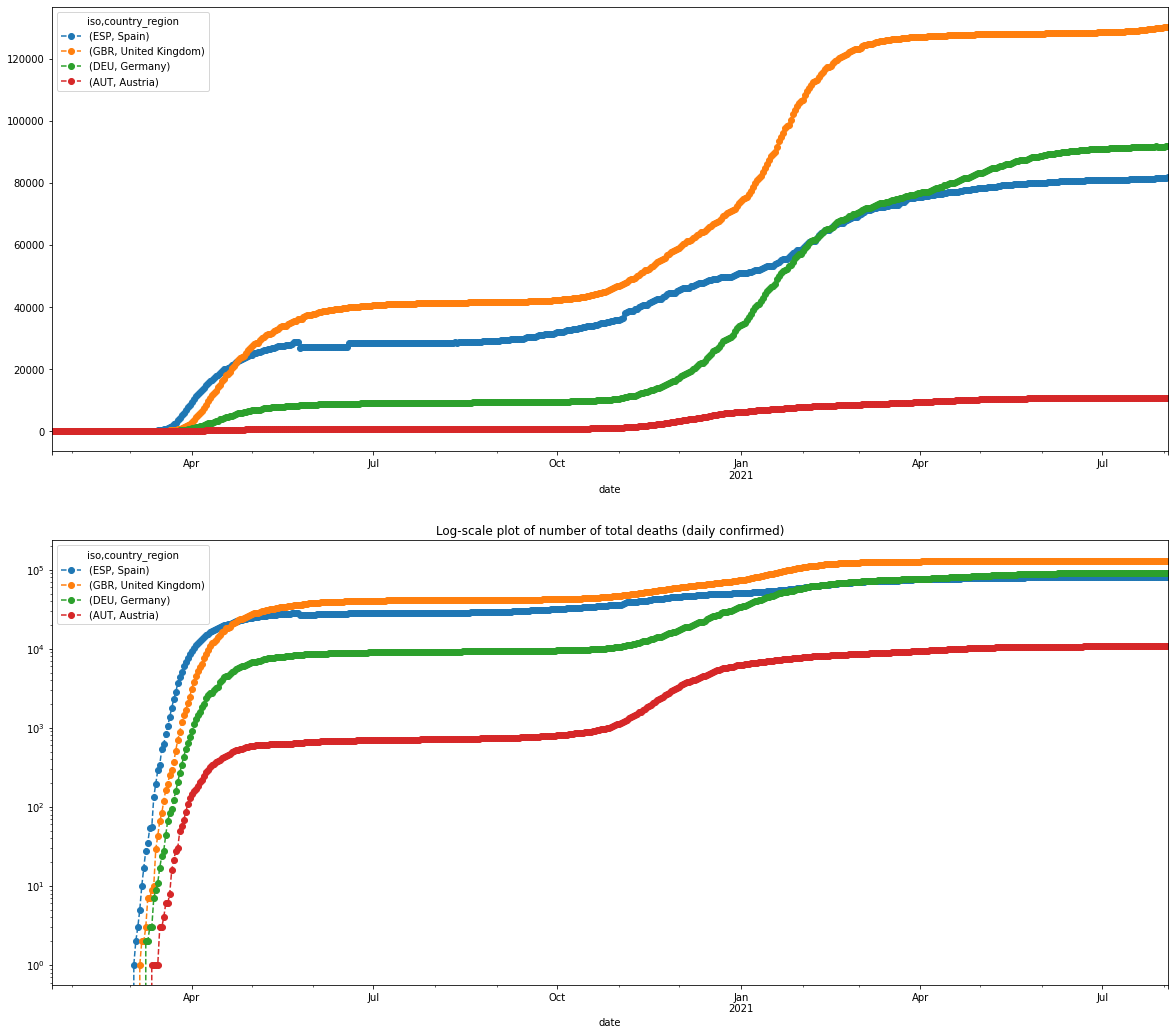

In [11]:
fig, (top_ax, bottom_ax) = plt.subplots(2, 1, figsize=(20, 18))
dead.plot(ax=top_ax, linestyle="--", marker="o")
dead.plot(ax=bottom_ax, linestyle="--", marker="o")
bottom_ax.set_yscale("log")
bottom_ax.set_title("Log-scale plot of number of total deaths (daily confirmed)")

## Detailed analysis for UK and Spain and predictions

In [12]:
# Base Data
confirmed = confirmed[["ESP", "GBR"]]
dead = dead[["ESP", "GBR"]]
last_day = confirmed.iloc[-1]
countries_of_interest = confirmed.columns[last_day.argsort()][::-1]
growth_rate = confirmed.pct_change()
abs_growth_confirmed = confirmed.diff()
abs_growth_deaths = dead.diff()

In [13]:
# Derived Data for plots
date_lockdown_ES = "2020-03-14"
date_lockdown_UK = "2020-03-23"
idx_lockdown_ES = confirmed.index.get_loc(date_lockdown_ES)
idx_lockdown_UK = confirmed.index.get_loc(date_lockdown_UK)

confirmed_on_lockdown_ES = abs_growth_confirmed["ESP"].iloc[idx_lockdown_ES]
confirmed_on_lockdown_UK = abs_growth_confirmed["GBR"].iloc[idx_lockdown_UK]

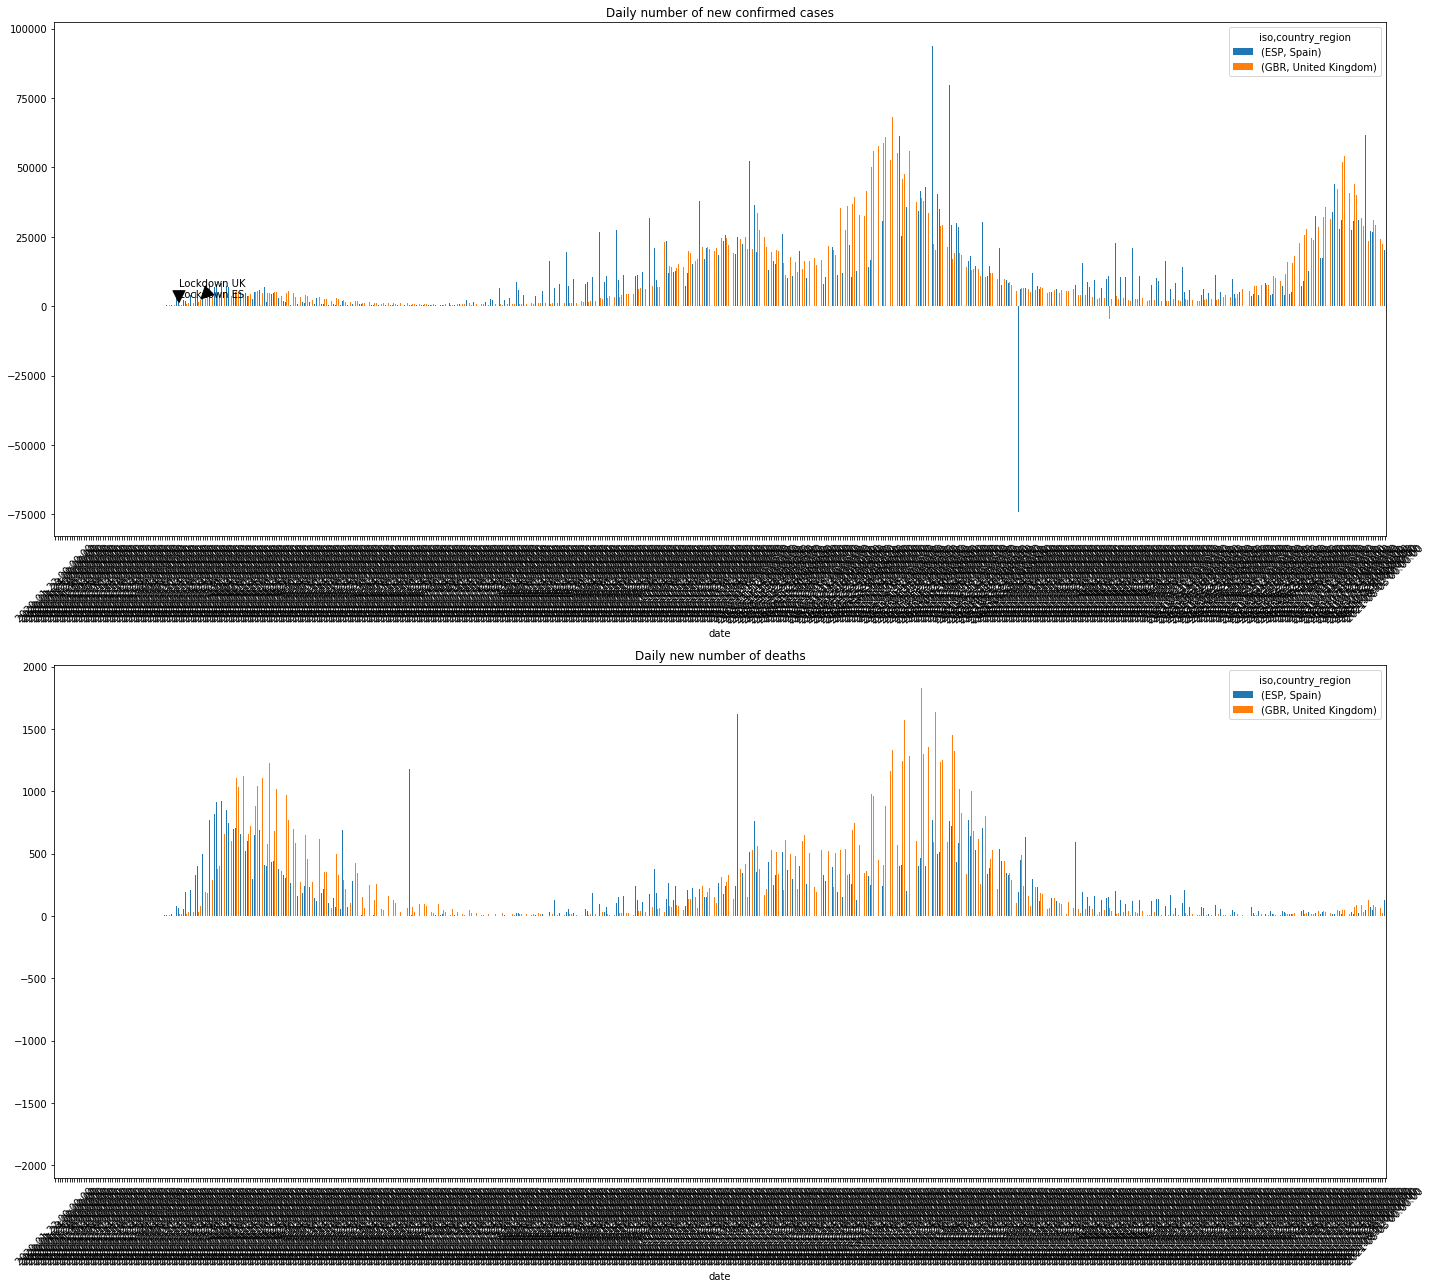

In [14]:
# Plot
fig, (top_ax, bottom_ax) = plt.subplots(2, 1, figsize=(20, 18))
abs_growth_confirmed.plot.bar(ax=top_ax, rot=45)
abs_growth_deaths.plot.bar(ax=bottom_ax, rot=45)
# plt.setp(top_ax.get_xticklabels()[::2], visible=False)
# plt.setp(bottom_ax.get_xticklabels()[::2], visible=False)
top_ax.set_title("Daily number of new confirmed cases")
top_ax.annotate(
    "Lockdown ES",
    xy=(idx_lockdown_ES, confirmed_on_lockdown_ES),
    xytext=(idx_lockdown_ES, confirmed_on_lockdown_ES + 2000),
    arrowprops=dict(facecolor="black", shrink=0.05),
)
top_ax.annotate(
    "Lockdown UK",
    xy=(idx_lockdown_UK, confirmed_on_lockdown_UK),
    xytext=(idx_lockdown_ES, confirmed_on_lockdown_UK + 5000),
    arrowprops=dict(facecolor="black", shrink=0.05),
)
bottom_ax.set_title("Daily new number of deaths")
plt.tight_layout()

### Predictive model: a simple approach

In [11]:
import numpy as np

NUM_DAYS = 17  # How many days ago, length of the window
# Build exponential weighting function


def exp_window(length=14, growth=1.1):
    window = growth ** np.arange(length)
    window = window / window.sum()
    return window

Text(0.5, 1.0, 'Weights over last 17 days.')

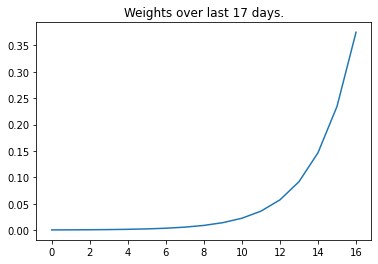

In [12]:
weighted_window = exp_window(length=NUM_DAYS, growth=1.6)
plt.figure()
plt.plot(weighted_window)
plt.title(f"Weights over last {NUM_DAYS} days.")

In [13]:
import pandas as pd

import statsmodels.api as sm

def fit_on_window(data, window):
    """ Fit the last window of the data
    """
    window_size = len(window)
    analysis_interval = data.iloc[-window_size:]
    log_analysis_interval = np.log(analysis_interval)
    log_analysis_interval[log_analysis_interval == -np.inf] = 0

    design = pd.DataFrame({'linear': np.arange(window_size),
                           'const': np.ones(window_size)})

    growth_rate = pd.DataFrame(data=np.zeros((1, len(data.columns))),
                               columns=data.columns)

    predicted_data = pd.DataFrame()
    predicted_data_lower = pd.DataFrame()
    predicted_data_upper = pd.DataFrame()
    prediction_dates = pd.date_range(data.index[-window_size],
                                    periods=window_size + 7)

    for country in data.columns:
        mod_wls = sm.WLS(log_analysis_interval[country].values, design,
                         weights=window, hasconst=True)
        res_wls = mod_wls.fit()
        growth_rate[country] = np.exp(res_wls.params.linear)
        predicted_data[country] = np.exp(res_wls.params.const +
                res_wls.params.linear * np.arange(len(prediction_dates))
            )
        # 1st and 3rd quartiles in the confidence intervals
        conf_int = res_wls.conf_int(alpha=.25)
        # We chose to account only for error in growth rate, and not in
        # baseline number of cases
        predicted_data_lower[country] = np.exp(res_wls.params.const +
                conf_int[0].linear * np.arange(len(prediction_dates))
            )
        predicted_data_upper[country] = np.exp(res_wls.params.const +
                conf_int[1].linear * np.arange(len(prediction_dates))
            )

    predicted_data = pd.concat(dict(prediction=predicted_data,
                                     lower_bound=predicted_data_lower,
                                     upper_bound=predicted_data_upper),
                                axis=1)
    predicted_data['date'] = prediction_dates
    predicted_data = predicted_data.set_index('date')
    if window_size > 10:
        # Don't show predictions more than 10 days ago
        predicted_data  = predicted_data.iloc[window_size - 10:]

    return growth_rate, predicted_data

#### Predicted Cases

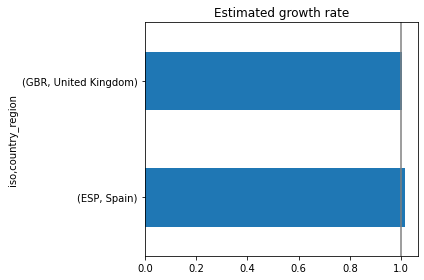

In [14]:
growth_rate, predicted_cases = fit_on_window(confirmed, weighted_window)

ax = growth_rate.T.plot(kind="barh", legend=False)
ax.set_title("Estimated growth rate")
ax.axvline(1, color=".5")
plt.tight_layout()

In [15]:
growth_rate

iso,ESP,GBR
country_region,Spain,United Kingdom
0,1.012956,1.00339


Text(0.5, 1.0, 'Number of confirmed cases in the last fortnight and prediction')

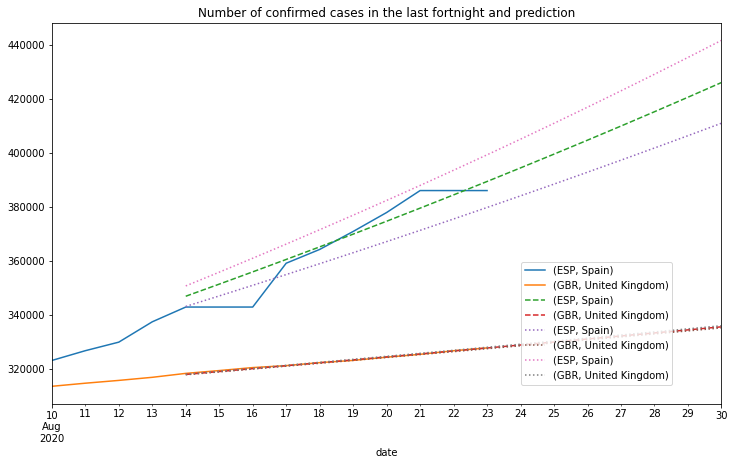

In [16]:
last_fortnight = confirmed.iloc[-14:]

ax = last_fortnight[countries_of_interest].plot(figsize=(12, 7))
predicted_cases["prediction"][countries_of_interest].plot(ax=ax, style="--")
predicted_cases["lower_bound"][countries_of_interest].plot(ax=ax, style=":")
predicted_cases["upper_bound"][countries_of_interest].plot(ax=ax, style=":")

plt.legend(loc=(0.7, 0.05))
ax.set_title("Number of confirmed cases in the last fortnight and prediction")

In [17]:
predicted_cases

prediction                          lower_bound  \
             (ESP, Spain) (GBR, United Kingdom)   (ESP, Spain)   
date                                                             
2020-08-14  346823.157650         317789.552226  343035.272396   
2020-08-15  351316.738171         318866.865043  346935.069662   
2020-08-16  355868.539332         319947.829971  350879.201781   
2020-08-17  360479.315462         321032.459392  354868.172776   
2020-08-18  365149.830665         322120.765728  358902.492396   
2020-08-19  369880.858944         323212.761444  362982.676187   
2020-08-20  374673.184330         324308.459046  367109.245558   
2020-08-21  379527.601015         325407.871085  371282.727841   
2020-08-22  384444.913478         326511.010153  375503.656367   
2020-08-23  389425.936621         327617.888883  379772.570529   
2020-08-24  394471.495906         328728.519954  384090.015851   
2020-08-25  399582.427490         329842.916086  388456.544060   
2020-08-26  404759.578362         330961.090043  392872.713154   
2020-08-27  410003.806485         332083.054632  397339.087477   
2020-08-28  415315.980941         333208.822702  401856.237786   
2020-08-29  420696.982068         334338.407148  406424.741329   
2020-08-30  426147.701614         335471.820908  411045.181915   

                                    upper_bound                        
           (GBR, United Kingdom)   (ESP, Spain) (GBR, United Kingdom)  
date                                                                   
2020-08-14         317674.077015  350652.869723         317905.069412  
2020-08-15         318734.449424  355753.745621         318999.335673  
2020-08-16         319798.361278  360928.822921         320097.368525  
2020-08-17         320865.824389  366179.181017         321199.180934  
2020-08-18         321936.850613  371505.915004         322304.785910  
2020-08-19         323011.451843  376910.135905         323414.196506  
2020-08-20         324089.640012  382392.970907         324527.425823  
2020-08-21         325171.427092  387955.563594         325644.487006  
2020-08-22         326256.825097  393599.074184         326765.393242  
2020-08-23         327345.846080  399324.679773         327890.157769  
2020-08-24         328438.502134  405133.574581         329018.793866  
2020-08-25         329534.805392  411026.970199         330151.314860  
2020-08-26         330634.768029  417006.095843         331287.734122  
2020-08-27         331738.402260  423072.198610         332428.065073  
2020-08-28         332845.720339  429226.543739         333572.321175  
2020-08-29         333956.734563  435470.414874         334720.515940  
2020-08-30         335071.457270  441805.114330         335872.662925

### Fatalities

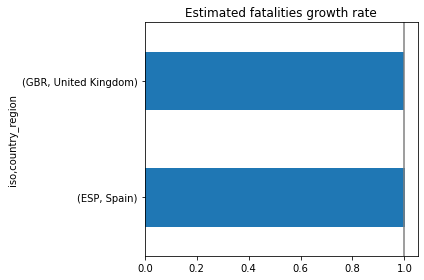

In [18]:
growth_rate, predicted_fatalities = fit_on_window(dead, weighted_window)

ax = growth_rate.T.plot(kind="barh", legend=False)
ax.set_title("Estimated fatalities growth rate")
ax.axvline(1, color=".5")
plt.tight_layout()

Text(0.5, 1.0, 'Number of confirmed fatalities in the last fortnight and prediction')

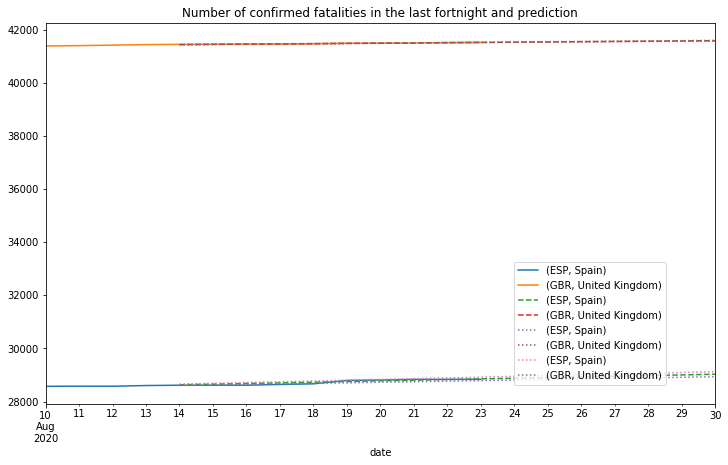

In [19]:
last_fortnight = dead.iloc[-14:]

ax = last_fortnight[countries_of_interest].plot(figsize=(12, 7))
predicted_fatalities["prediction"][countries_of_interest].plot(ax=ax, style="--")
predicted_fatalities["lower_bound"][countries_of_interest].plot(ax=ax, style=":")
predicted_fatalities["upper_bound"][countries_of_interest].plot(ax=ax, style=":")

plt.legend(loc=(0.7, 0.05))
ax.set_title("Number of confirmed fatalities in the last fortnight and prediction")